In [1]:
import pandas as pd
from datetime import datetime

In [5]:
# Data import
df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/headlines_english_arabic_countries.csv')

/var/folders/jn/gt3868vd039by14gxmgb54b40000gn/T/ipykernel_3026/4065669595.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/headlines_english_arabic_countries.csv')


In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773846 entries, 0 to 773845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gkgrecordid          773846 non-null  object 
 1   date                 773846 non-null  float64
 2   subsourcecommonname  773743 non-null  object 
 3   documentidentifier   773846 non-null  object 
 4   enhancedthemes       693173 non-null  object 
 5   enhancedlocations    773846 non-null  object 
 6   tone                 773846 non-null  object 
 7   extrasxml            551861 non-null  object 
 8   translationinfo      0 non-null       float64
dtypes: float64(2), object(7)
memory usage: 53.1+ MB


,gkgrecordid,date,subsourcecommonname,documentidentifier,enhancedthemes,enhancedlocations,tone,extrasxml,translationinfo
0,20151011213000-456,2.015101e+13,dailynewsegypt.com,http://www.dailynewsegypt.com/2015/10/11/tgm-m...,"ECON_WORLDCURRENCIES_DOLLAR,2612;ECON_WORLDCUR...","4#Milan, Lombardia, Italy#IT#IT09#18363#45.466...","1.76991150442478,2.54424778761062,0.7743362831...",NaN,NaN
1,20151011213000-1551,2.015101e+13,gizmodo.com.au,http://www.gizmodo.com.au/2015/10/5-ideas-that...,"MANMADE_DISASTER_IMPLIED,58;MANMADE_DISASTER_I...","3#Manhattan, New York, United States#US#USNY#N...","0.843320017754106,2.13049267643142,1.287172658...",NaN,NaN
2,20151011213000-1644,2.015101e+13,competitor.com,http://velonews.competitor.com/2015/10/news/ch...,"WB_2670_JOBS,696;WB_2815_SKILLS_AND_EDUCATION,...","4#Abu Dhabi, Abu ZÂ¸Aby, United Arab Emirates#...","4.83271375464684,4.83271375464684,0,4.83271375...",NaN,NaN
3,20151016043000-1997,2.015102e+13,daily-chronicle.com,http://www.daily-chronicle.com/2015/10/15/saud...,"GENERAL_GOVERNMENT,620;GENERAL_GOVERNMENT,4524...","4#Baghdad, Baghdad, Iraq#IZ#IZ07#36785#33.3386...","-4.35754189944134,1.11731843575419,5.474860335...",NaN,NaN
4,20151011150000-503,2.015101e+13,dailynewsegypt.com,http://www.dailynewsegypt.com/2015/10/11/sharp...,"KIDNAP,2150;EXTREMISM,2184;BORDER,2772;TAX_REL...","4#Gaza, Israel (General), Israel#IS#IS00#18315...","-9.05730129390018,0.924214417744917,9.98151571...",NaN,NaN


# Preprocessing

In [7]:
df.date.iloc[0]

20151011213000.0

In [8]:
# Date conversion
df.date = df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
df.date

0        2015-10-11 21:30:00
1        2015-10-11 21:30:00
2        2015-10-11 21:30:00
3        2015-10-16 04:30:00
4        2015-10-11 15:00:00
                 ...        
773841   2023-03-07 13:45:00
773842   2023-03-07 19:15:00
773843   2023-03-07 19:15:00
773844   2023-03-07 19:15:00
773845   2023-03-07 19:15:00
Name: date, Length: 773846, dtype: datetime64[ns]

In [9]:
df.enhancedthemes.iloc[0]

'ECON_WORLDCURRENCIES_DOLLAR,2612;ECON_WORLDCURRENCIES_US_DOLLAR,2612;TAX_FNCACT_TENANTS,2567;TAX_FNCACT_TENANTS,2667;AFFECT,2532;NEGOTIATIONS,1137;NEGOTIATIONS,2805;NEGOTIATIONS,4173;WB_840_JUSTICE,1137;WB_840_JUSTICE,2805;WB_840_JUSTICE,4173;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,1137;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,2805;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,4173;WB_939_NEGOTIATION,1137;WB_939_NEGOTIATION,2805;WB_939_NEGOTIATION,4173;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,1137;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,2805;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,4173;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,1137;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,2805;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,4173;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,1137;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,2805;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,4173;WB_843_DISPUTE_RESOLUTION,1137;WB_843_DISPUTE_RESOLUTION,2805;WB_843_DISPUTE_RESOLUTION,4173;WB_2471_PEACEKEEPING,1137;WB_2471_PEACEKEEPIN

In [7]:
(df['tone'].str.count(',') + 1).value_counts()
# df['tone'].iloc[1]

7    773846
Name: tone, dtype: int64

In [8]:
#  Cleaning of the themes
def themes_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.split(',')[0] for elem in s_.split(';')] # delete the number after the comma

    final_str=[]
    separator=' '
    for s in modified_str:
        if s.split('_')[0]=='WB':
            final_str.append(separator.join(s.split('_')[2:]).split(' ')) # delete the prefix 'WB_XXX', remove underscore and split each word
        else:
            final_str.append(separator.join(s.split('_')).split(' '))

    # to get a list of words and not a list of sub lists
    merged_list = []
    for sublist in final_str:
        merged_list.extend(sublist)

    return(merged_list) 

In [9]:
# Test of cleaning
original_str = 'WB_843_DISPUTE_RESOLUTION,1137;WB_843_DISPUTE_RESOLUTION,2805;TEST_TESTOS,2021'
res = themes_cleaning(original_str)
print(res, res[0])

['DISPUTE', 'RESOLUTION', 'DISPUTE', 'RESOLUTION', 'TEST', 'TESTOS'] DISPUTE


In [10]:
df['adj_enhancedthemes'] = df.enhancedthemes.apply(lambda x: themes_cleaning(x))

In [11]:
# Drop empty headlines
null_counts = df.isnull().sum()
print(null_counts)
df = df.dropna(subset=['enhancedthemes'])

gkgrecordid                 0
date                        0
subsourcecommonname       103
documentidentifier          0
enhancedthemes          80673
enhancedlocations           0
tone                        0
extrasxml              221985
translationinfo        773846
adj_enhancedthemes          0
dtype: int64


In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

[nltk_data] Downloading package stopwords to /Users/flickr-
[nltk_data]     xc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['adj_enhancedthemes'] = df['adj_enhancedthemes'].apply(lambda x: remove_stopwords(x))

In [15]:
df.adj_enhancedthemes.iloc[1]

['MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 'MANMADE',
 'DISASTER',
 'IMPLIED',
 

In [16]:
df.enhancedlocations.iloc[1]

"3#Manhattan, New York, United States#US#USNY#NY061#40.7834#-73.9662#971945#6375;3#Manhattan, New York, United States#US#USNY#NY061#40.7834#-73.9662#971945#6810;1#United Kingdom#UK#UK##54#-2#UK#3955;1#United Kingdom#UK#UK##54#-2#UK#4137;1#United Kingdom#UK#UK##54#-2#UK#5200;1#United Kingdom#UK#UK##54#-2#UK#6263;1#United Kingdom#UK#UK##54#-2#UK#6342;1#United Kingdom#UK#UK##54#-2#UK#9976;2#California, United States#US#USCA##36.17#-119.746#CA#8540;2#California, United States#US#USCA##36.17#-119.746#CA#11055;2#New York, United States#US#USNY##42.1497#-74.9384#NY#3895;1#America#US#US##38#-97#US#2890;1#America#US#US##38#-97#US#10478;1#America#US#US##38#-97#US#10928;4#Vancouver, British Columbia, Canada#CA#CA02#12552#49.25#-123.133#-575268#3537;4#Vancouver, British Columbia, Canada#CA#CA02#12552#49.25#-123.133#-575268#4823;1#Chinese#CH#CH##35#105#CH#11370;4#London, London, City Of, United Kingdom#UK#UKH9#40110#51.5#-0.116667#-2601889#3939;4#London, London, City Of, United Kingdom#UK#UKH9#4011

In [17]:
#  Cleaning of the locations
def locations_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.split('#')[1] for elem in s_.split(';')]
    final_str = [elem.split(', ') for elem in modified_str ]
    merged_list = []
    for sublist in final_str:
        merged_list.extend(sublist)
    return(merged_list) 


In [18]:
# Test of cleaning
original_str = '3#Manhattan, New York, United States#US#USNY#NY061#40.7834#-73.9662#971945#6375;3#Manhattan, New York, United States#US#USNY#NY061#40.7834#-73.9662#971945#6810;1#United Kingdom#UK#UK##54#-2#UK#3955;1#United Kingdom#UK#UK##54#-2#UK#4137;1#United Kingdom#UK#UK##54#-2#UK#5200'
res = locations_cleaning(original_str)
print(res)

['Manhattan', 'New York', 'United States', 'Manhattan', 'New York', 'United States', 'United Kingdom', 'United Kingdom', 'United Kingdom']


In [19]:
df['adj_enhancedlocations'] = df.enhancedlocations.apply(lambda x: locations_cleaning(x))

In [23]:
df.adj_enhancedlocations.iloc[5]

['First Gulf Bank',
 'Dubayy',
 'United Arab Emirates',
 'Qatar',
 'Qatar',
 'Dubai',
 'Dubayy',
 'United Arab Emirates',
 'Dubai',
 'Dubayy',
 'United Arab Emirates']

# Split the Dataset

In [25]:
# Filter the news whose enhancedthemes or locations contain UAE/KSA/EGYPT respectively
def country_split(filter_,df):
    condition = (df['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter_)) &
             (df['adj_enhancedlocations'].apply(lambda x: any(keyword in x for keyword in filter_))))
#     condition = (
#         df['adj_enhancedthemes'].apply(lambda x: sum(keyword in x for keyword in filter_) >= 2) & 
#         df['adj_enhancedlocations'].apply(lambda x: sum(keyword in x for keyword in filter_) >= 2)
#     )
    return df[condition]

df_UAE = country_split(['UAE','United Arab Emirates'],df)
df_KSA = country_split(['KSA','Saudi Arabia'],df)
df_EGYPT = country_split(['EGYPT','Egypt'],df)


In [39]:
# print(df_UAE.date.describe())
df_UAE.info()
df_UAE.documentidentifier.iloc[:20]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 740 to 772749
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   gkgrecordid            512 non-null    object        
 1   date                   512 non-null    datetime64[ns]
 2   subsourcecommonname    512 non-null    object        
 3   documentidentifier     512 non-null    object        
 4   enhancedthemes         512 non-null    object        
 5   enhancedlocations      512 non-null    object        
 6   tone                   512 non-null    object        
 7   extrasxml              403 non-null    object        
 8   translationinfo        0 non-null      float64       
 9   adj_enhancedthemes     512 non-null    object        
 10  adj_enhancedlocations  512 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 48.0+ KB


740      http://www.emirates247.com/business/gold-curre...
3502     http://www.emirates247.com/business/gold-curre...
3893     http://www.dubaichronicle.com/2015/10/19/iran-...
6415     http://www.emirates247.com/business/gold-curre...
6455     http://www.emirates247.com/business/gold-curre...
7855     http://www.reuters.com/article/2015/10/27/emir...
8581     http://www.zawya.com/story/UAE_bank_ADIB_has_n...
8654     http://www.traveldailymedia.com/228363/sterlin...
8685     http://thestockradio.com/mideast-funds-heavily...
9479                   http://www.arabnews.com/news/817096
10486    http://www.arabianbusiness.com/dubai-apartment...
10687    http://www.emirates247.com/business/gold-curre...
11374    http://uk.reuters.com/article/2015/10/08/egypt...
12057    http://www.emirates247.com/crime/local/man-sta...
13020    http://www.emirates247.com/business/gold-curre...
15857    https://www.zawya.com/story/More_than_1_bln_in...
16850    http://www.emirates247.com/business/gold-curre.

# Descriptive Analysis

 **word count**

In [27]:
# word count and world cloud for UAE

# Explode the words_column into separate rows
exploded_df_UAE = df_UAE.explode('adj_enhancedthemes')
word_counts = exploded_df_UAE['adj_enhancedthemes'].value_counts()

print(word_counts[:20])

TAX                10724
ECON                5295
FNCACT              5222
ETHNICITY           3582
EPU                 3043
WORLDCURRENCIES     3026
ARAB                2421
POLICY              2226
MINING              1752
NUTRITION           1433
HEALTH              1256
CRISISLEX            955
SYSTEMS              931
ENERGY               924
EXTRACTIVES          904
GOLD                 882
ORE                  874
METAL                874
POPULATION           776
ECONOMY              705
Name: adj_enhancedthemes, dtype: int64


In [ ]:
# # define function to extract co-occurring words with a given keyword
# def get_cooccurring_words(words, keyword):
#     if keyword in words:
#         return [w for w in words if w != keyword]
#     else:
#         return []
    
# df_UAE['cooccurring_words'] = df_UAE['adj_enhancedthemes'].apply(lambda x: get_cooccurring_words(x, 'TRADE'))

# # count the occurrences of each co-occurring word across all rows
# cooccurring_words = df_UAE['cooccurring_words'].sum()
# word_counts = dict(Counter(cooccurring_words))

# # extract the top 10 co-occurring words with the word 'TRADE'
# top_cooccurring_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
# print(top_cooccurring_words)

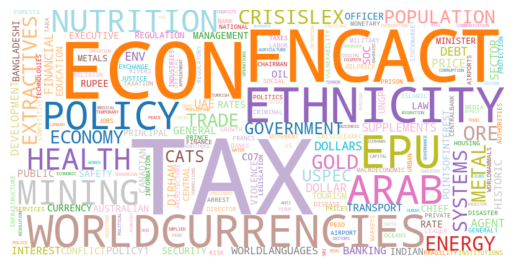

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with the word counts
wordcloud = WordCloud(background_color='white',
    contour_color='steelblue',
    width=800,
    height=400,
    colormap='tab20').generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
econ_counts = exploded_df_UAE.loc[exploded_df_UAE['adj_enhancedthemes'].str.startswith('ECON'), 'adj_enhancedthemes'].value_counts()
print(econ_counts)

ECON          5295
ECONOMY        705
ECONOMIC       114
ECONOMIST        7
ECONOMICS        7
ECONOMISTS       3
Name: adj_enhancedthemes, dtype: int64


In [30]:
df_UAE['tone'].iloc[1]

'2.75650842266462,4.59418070444104,1.83767228177642,6.43185298621746,21.1332312404288,0.765696784073507,583'

In [31]:
# Definition of the filter keywords
# CONSUMPTION
filter = ['CONSUMPTION','CONSUME','CONSUMER','PURCHANSE','PURCHANSING','PURCHANSER','BUYER']
df_UAE_CONSUME = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

# TRADE
filter = ['TRADE']
df_UAE_TRADE = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

# EMPLOYMENT
filter = ['EMPLOYMENT','UNEMPLOYMENT']
df_UAE_EMPLOY = df_UAE[df_UAE['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]


In [ ]:
# define function to extract co-occurring words with a given keyword
def get_cooccurring_words(words, keyword):
    if keyword in words:
        return [w for w in words if w != keyword]
    else:
        return []
    
df_UAE_TRADE['cooccurring_words'] = df_UAE_TRADE['adj_enhancedthemes'].apply(lambda x: get_cooccurring_words(x, 'TRADE'))

# count the occurrences of each co-occurring word across all rows
cooccurring_words = df_UAE_TRADE['cooccurring_words'].sum()
word_counts = dict(Counter(cooccurring_words))

# extract the top 10 co-occurring words with the word 'TRADE'
top_cooccurring_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
print(top_cooccurring_words)

